In [2]:
import pandas as pd

Business one seems actually useful, particularly the categories and attributes columns

In [170]:
df_business = pd.read_json('yelp_academic_dataset_business.json', orient='records',lines=True)

In [172]:
len(df_business)

150346

In [108]:
df_business[df_business['state'] == 'GA']

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


In [88]:
df_business = df_business[df_business['is_open'] == 1]

In [96]:
test = df_business[df_business['review_count'] >= 15]

In [101]:
test['isRestaurant'] = test['categories'].apply(lambda x: 1 if x is not None and ('food' in x.lower() or 'restaurant' in x.lower()) else 0)

/var/folders/0r/jgxf90613857lwsh8bx4qs880000gn/T/ipykernel_94593/1691408026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['isRestaurant'] = test['categories'].apply(lambda x: 1 if x is not None and ('food' in x.lower() or 'restaurant' in x.lower()) else 0)


In [104]:
test = test[test['isRestaurant'] == 1]

31905

In [118]:
valid_business_ids = test['business_id'].unique()

31905

In [111]:

d = {}
for i in test['state'].unique():
    d[i] = len(test[test['state'] == i])
    
s = sorted(d.items(), key=lambda i: i[1], reverse=True)
s

[('PA', 7314),
 ('FL', 5668),
 ('TN', 2752),
 ('IN', 2610),
 ('MO', 2476),
 ('LA', 2255),
 ('NJ', 1979),
 ('AZ', 1775),
 ('NV', 1256),
 ('AB', 1037),
 ('ID', 926),
 ('CA', 813),
 ('DE', 546),
 ('IL', 497),
 ('HI', 1)]

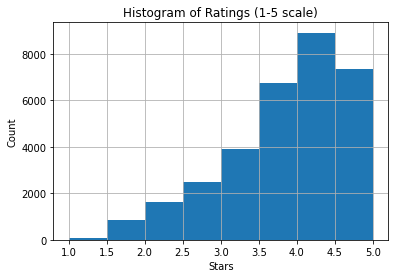

In [197]:
test['stars'].hist(bins=[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Histogram of Ratings (1-5 scale)')

# show the plot
plt.savefig('starhist.jpg')
plt.show()

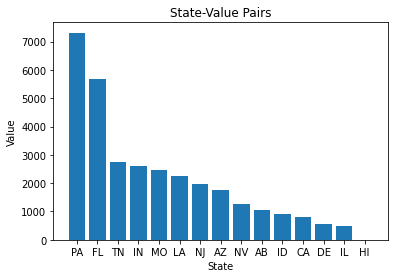

In [117]:
import matplotlib.pyplot as plt

# Create empty lists to store states and values
states = []
values = []

# Iterate over the list of tuples and extract the states and values
for state, value in s:
    states.append(state)
    values.append(value)

# Create a bar chart
plt.bar(states, values)

# Set the x-axis label
plt.xlabel('State')

# Set the y-axis label
plt.ylabel('Value')

# Set the title of the plot
plt.title('State-Value Pairs')

# Show the plot
plt.savefig('plot.jpg',dpi=300)
plt.show()


Reviews can be iterated over using sentiment analysis to augment the business table with a more realistic star score

In [149]:
df_review = pd.read_json('yelp_academic_dataset_review.json', orient='records',lines=True, chunksize=100000)

In [150]:
chunk = next(df_review)

In [151]:
chunk

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
...,...,...,...,...,...,...,...,...,...
99995,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56
99996,xH1AoE-4nf2ECGQJRjO4_g,2clTdtp-BjphxLjN83CpUA,G0xz3kyRhRi6oZl7KfR0pA,1,1,0,0,The equipment is so old and so felty! I just u...,2015-04-05 23:31:52
99997,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15
99998,6NfkodAdhvI89xONXuBC3A,rnNQzeKJbvqVCsYsL10mkQ,dChRGpit9fM_kZK5pafNyA,2,0,0,0,Came here for brunch - had an omlette ($19 + t...,2018-06-11 12:45:08


In [152]:
num_valid_reviews = 0
num_valid_users = 0
i = 0
while True:
    try:
        chunk['valid'] = chunk['business_id'].apply(lambda x: 1 if x in valid_business_ids else 0)
        chunk = chunk[chunk['valid'] == 1]
        num_valid_reviews += len(chunk)
        num_valid_users += chunk['user_id'].nunique()
        chunk = next(df_review)
        print(num_valid_reviews, num_valid_users)
    except Exception:
        break
    
    
print(i)

56787 48350
113981 97438
170398 146387
227874 196480
285605 245951
343390 295172
401429 339236
459703 389413
517906 438915


KeyboardInterrupt: 

In [166]:
df_user = pd.read_json('yelp_academic_dataset_user.json', orient='records', lines=True, chunksize=700000)

In [167]:
chunk_user = next(df_user)

In [168]:
chunk_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [169]:
chunk_user.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,39.334986,81.196303,33.667581,48.575531,2.778469,3.720302,3.690170,0.571150,0.375579,0.268347,0.140864,2.900541,6.221013,5.766343,5.766343,2.153123,2.569659
std,122.513690,977.751432,615.395100,860.634395,28.728242,0.995030,111.956026,20.549617,24.404831,18.640944,16.666245,97.690881,186.033135,143.552821,143.552821,48.307084,150.724289
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,3.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,6.000000,1.000000,1.000000,0.000000,3.890000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,25.000000,5.000000,6.000000,1.000000,4.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,17473.000000,206296.000000,185823.000000,199878.000000,12497.000000,5.000000,25784.000000,13501.000000,14180.000000,13654.000000,12669.000000,59031.000000,101097.000000,49967.000000,49967.000000,15934.000000,82630.000000


In [148]:
num_valid_users = 0
while chunk_user is not None:
    chunk_user['valid'] = chunk_user['business_id'].apply(lambda x: 1 if x in valid_business_ids else 0)
    chunk_user = chunk_user[chunk_user['valid'] == 1]
    num_valid_users += len(chunk_user)
    print(len(chunk_user))
print(num_valid_users)

KeyError: 'business_id'

In [49]:
df_tip = pd.read_json('yelp_academic_dataset_tip.json', orient='records', lines=True)

In [58]:
df_tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [59]:
df_checkin = pd.read_json('yelp_academic_dataset_checkin.json', orient='records', lines=True)

In [60]:
df_checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


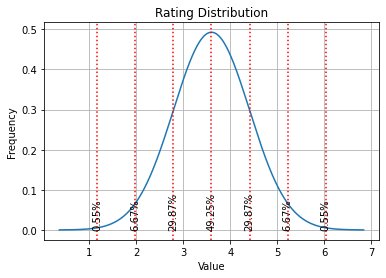

In [176]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 3.6, 0.81
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

# Create plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Calculate and plot dotted lines for standard deviations
stds = [-3, -2, -1, 0, 1, 2, 3]
for std in stds:
    plt.axvline(mu + std*sigma, linestyle='dotted', color='r')
    pct = round((1 / (np.sqrt(2*np.pi)*sigma)) * np.exp(-(std**2)/2) * 100, 2)
    plt.text(mu + std*sigma, 0, f"{pct}%", rotation=90, va='bottom', ha='center')

# Set up plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.grid(True)

# Show plot
plt.show()